In [1]:
!pip install flappy-bird-gymnasium


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [21]:
from utils import parse_arguments, read_settings, plot_rewards, simulate_notebook
import matplotlib.pyplot as plt
import gymnasium as gym
import flappy_bird_gymnasium
import torch
from tqdm import tqdm
from agent import DQNAgent, DoubleDQNAgent
import os
import collections
import numpy as np

In [3]:
device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

In [4]:
def train_dqn(env: gym.Env, agent: DQNAgent, episodes: int):
    episode_rewards = []
    recent_rewards = collections.deque(maxlen=100)
    for episode in tqdm(range(episodes), desc="Training: "):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, next_state, reward, done)
            state = next_state
            total_reward += reward
            agent.replay()

        # print("Episode: {}/{}, Total Reward: {}, Epsilon: {:.2}".format(
        #     episode+1, episodes, total_reward, agent.epsilon))
        episode_rewards.append(total_reward)
        recent_rewards.append(total_reward)
        if (episode + 1) % 100 == 0:
            print(
                f"\rEpisode {episode + 1}\tAverage Score: {sum(recent_rewards) / len(recent_rewards):.2f}")
    return episode_rewards

In [5]:
print(f'{device = }')

train_settings = {'episodes': 2000}
print(f'{train_settings = }')

device = device(type='mps')
train_settings = {'episodes': 2000}


In [6]:
# Environment
env = gym.make('FlappyBird-v0', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
checkpoint_folder = 'checkpoints'
os.makedirs(checkpoint_folder, exist_ok=True)

In [7]:
# Agent
dqn_agent_settings = {'lr': 0.001,
                      'gamma': 0.95,
                      'epsilon': 1.0,
                      'epsilon_min': 0.01,
                      'epsilon_decay': 0.995,
                      'batch_size': 64
                      }
dqn_agent = DQNAgent(state_size, action_size, **dqn_agent_settings)

dqn_checkpoint_path = os.path.join(checkpoint_folder, 'DQNAgent.pth')

dqn_rewards = train_dqn(env, dqn_agent, **train_settings)

dqn_agent.save_state(dqn_checkpoint_path)

Training:   0%|          | 0/2000 [00:00<?, ?it/s]/Users/youssefshaarawy/Library/CloudStorage/OneDrive-City,UniversityofLondon/Documents/MSc Files/INM707/Project/Advanced Task/venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/youssefshaarawy/Library/CloudStorage/OneDrive-City,UniversityofLondon/Documents/MSc Files/INM707/Project/Advanced Task/venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/youssefshaarawy/Library/CloudStorage/OneDrive-City,UniversityofLondon/Documents/MSc Files/INM707/Project/Advanced Task/agent.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please c

Episode 100	Average Score: -0.79


Training:  10%|█         | 201/2000 [00:34<05:26,  5.51it/s]

Episode 200	Average Score: -0.17


Training:  15%|█▌        | 301/2000 [00:51<04:23,  6.45it/s]

Episode 300	Average Score: 0.16


Training:  20%|██        | 401/2000 [01:06<04:36,  5.79it/s]

Episode 400	Average Score: 1.10


Training:  25%|██▌       | 501/2000 [01:24<03:42,  6.74it/s]

Episode 500	Average Score: 1.81


Training:  30%|███       | 600/2000 [01:40<04:24,  5.30it/s]

Episode 600	Average Score: 1.56


Training:  35%|███▌      | 701/2000 [01:56<03:12,  6.76it/s]

Episode 700	Average Score: 1.39


Training:  40%|████      | 801/2000 [02:13<03:54,  5.11it/s]

Episode 800	Average Score: 1.66


Training:  45%|████▌     | 901/2000 [02:30<02:29,  7.37it/s]

Episode 900	Average Score: 2.00


Training:  50%|█████     | 1001/2000 [02:45<02:14,  7.42it/s]

Episode 1000	Average Score: 1.67


Training:  55%|█████▌    | 1101/2000 [03:03<02:38,  5.68it/s]

Episode 1100	Average Score: 1.87


Training:  60%|██████    | 1201/2000 [03:22<02:07,  6.29it/s]

Episode 1200	Average Score: 2.73


Training:  65%|██████▌   | 1300/2000 [03:38<01:43,  6.74it/s]

Episode 1300	Average Score: 1.78


Training:  70%|███████   | 1401/2000 [03:55<01:21,  7.33it/s]

Episode 1400	Average Score: 2.58


Training:  75%|███████▌  | 1501/2000 [04:11<01:16,  6.51it/s]

Episode 1500	Average Score: 2.09


Training:  80%|████████  | 1601/2000 [04:27<00:54,  7.29it/s]

Episode 1600	Average Score: 1.00


Training:  85%|████████▌ | 1701/2000 [04:44<00:44,  6.70it/s]

Episode 1700	Average Score: 2.01


Training:  90%|█████████ | 1801/2000 [05:01<00:31,  6.35it/s]

Episode 1800	Average Score: 2.14


Training:  95%|█████████▌| 1901/2000 [05:18<00:15,  6.45it/s]

Episode 1900	Average Score: 1.84


Training: 100%|██████████| 2000/2000 [05:34<00:00,  5.98it/s]

Episode 2000	Average Score: 1.75


In [8]:
dqn_agent = DQNAgent(state_size, action_size, **
                     dqn_agent_settings, use_prioritized_replay=True)

dqn_priority_rewards = train_dqn(env, dqn_agent, **train_settings)

dqn_agent.save_state(dqn_checkpoint_path)

Training:   5%|▌         | 100/2000 [00:17<07:11,  4.40it/s]

Episode 100	Average Score: -1.11


Training:  10%|█         | 201/2000 [00:42<07:03,  4.24it/s]

Episode 200	Average Score: 0.73


Training:  15%|█▌        | 301/2000 [01:07<06:34,  4.31it/s]

Episode 300	Average Score: 0.10


Training:  20%|██        | 400/2000 [01:33<07:26,  3.59it/s]

Episode 400	Average Score: 0.87


Training:  25%|██▌       | 501/2000 [02:02<04:54,  5.10it/s]

Episode 500	Average Score: 1.53


Training:  30%|███       | 601/2000 [02:26<05:42,  4.08it/s]

Episode 600	Average Score: 1.35


Training:  35%|███▌      | 701/2000 [02:48<04:25,  4.89it/s]

Episode 700	Average Score: 1.55


Training:  40%|████      | 800/2000 [03:11<04:21,  4.59it/s]

Episode 800	Average Score: 1.11


Training:  45%|████▌     | 900/2000 [03:34<03:44,  4.90it/s]

Episode 900	Average Score: 1.51


Training:  50%|█████     | 1001/2000 [04:00<04:05,  4.07it/s]

Episode 1000	Average Score: 1.81


Training:  55%|█████▌    | 1101/2000 [04:26<03:28,  4.31it/s]

Episode 1100	Average Score: 2.50


Training:  60%|██████    | 1200/2000 [04:51<02:58,  4.49it/s]

Episode 1200	Average Score: 1.76


Training:  65%|██████▌   | 1300/2000 [05:14<02:42,  4.30it/s]

Episode 1300	Average Score: 1.37


Training:  70%|███████   | 1401/2000 [05:39<02:13,  4.49it/s]

Episode 1400	Average Score: 1.97


Training:  75%|███████▌  | 1501/2000 [06:00<01:37,  5.12it/s]

Episode 1500	Average Score: 1.26


Training:  80%|████████  | 1600/2000 [06:21<01:16,  5.22it/s]

Episode 1600	Average Score: 1.62


Training:  85%|████████▌ | 1701/2000 [06:42<01:03,  4.72it/s]

Episode 1700	Average Score: 1.65


Training:  90%|█████████ | 1801/2000 [07:03<00:36,  5.41it/s]

Episode 1800	Average Score: 1.97


Training:  95%|█████████▌| 1900/2000 [07:23<00:21,  4.59it/s]

Episode 1900	Average Score: 1.66


Training: 100%|██████████| 2000/2000 [07:45<00:00,  4.30it/s]

Episode 2000	Average Score: 1.86


In [9]:
ddqn_agent_settings = {'lr': 0.001,
                       'gamma': 0.95,
                       'epsilon': 1.0,
                       'epsilon_min': 0.01,
                       'epsilon_decay': 0.995,
                       'batch_size': 64,
                       'alpha': 1e-3,
                       'update_frequency': 4}
# Agent
ddqn_agent = DoubleDQNAgent(state_size, action_size, **ddqn_agent_settings)

ddqn_checkpoint_path = os.path.join(checkpoint_folder, 'DoubleDQNAgent.pth')

ddqn_rewards = train_dqn(env, ddqn_agent, **train_settings)

ddqn_agent.save_state(ddqn_checkpoint_path)

Training:   5%|▌         | 101/2000 [00:12<03:52,  8.16it/s]

Episode 100	Average Score: -1.52


Training:  10%|█         | 200/2000 [00:25<04:21,  6.88it/s]

Episode 200	Average Score: -1.75


Training:  15%|█▌        | 301/2000 [00:38<03:24,  8.30it/s]

Episode 300	Average Score: -2.75


Training:  20%|██        | 400/2000 [00:52<04:13,  6.31it/s]

Episode 400	Average Score: -1.89


Training:  25%|██▌       | 501/2000 [01:07<03:11,  7.84it/s]

Episode 500	Average Score: -0.74


Training:  30%|███       | 601/2000 [01:23<03:42,  6.29it/s]

Episode 600	Average Score: 0.31


Training:  35%|███▌      | 701/2000 [01:37<02:53,  7.50it/s]

Episode 700	Average Score: 0.46


Training:  40%|████      | 801/2000 [01:53<03:22,  5.92it/s]

Episode 800	Average Score: -0.03


Training:  45%|████▌     | 900/2000 [02:10<02:31,  7.24it/s]

Episode 900	Average Score: 0.72


Training:  50%|█████     | 1000/2000 [02:28<02:27,  6.77it/s]

Episode 1000	Average Score: 1.43


Training:  55%|█████▌    | 1101/2000 [02:43<02:31,  5.93it/s]

Episode 1100	Average Score: 1.71


Training:  60%|██████    | 1201/2000 [03:00<01:53,  7.02it/s]

Episode 1200	Average Score: 1.29


Training:  65%|██████▌   | 1301/2000 [03:16<02:00,  5.81it/s]

Episode 1300	Average Score: 0.99


Training:  70%|███████   | 1401/2000 [03:36<01:30,  6.65it/s]

Episode 1400	Average Score: 1.96


Training:  75%|███████▌  | 1501/2000 [03:53<01:04,  7.69it/s]

Episode 1500	Average Score: 1.67


Training:  80%|████████  | 1600/2000 [04:09<01:09,  5.73it/s]

Episode 1600	Average Score: 1.48


Training:  85%|████████▌ | 1700/2000 [04:27<01:46,  2.83it/s]

Episode 1700	Average Score: 2.65


Training:  90%|█████████ | 1800/2000 [04:47<00:36,  5.50it/s]

Episode 1800	Average Score: 2.49


Training:  95%|█████████▌| 1901/2000 [05:06<00:19,  5.16it/s]

Episode 1900	Average Score: 2.28


Training: 100%|██████████| 2000/2000 [05:26<00:00,  6.13it/s]

Episode 2000	Average Score: 3.70


In [10]:
# Agent
ddqn_agent = DoubleDQNAgent(state_size, action_size,
                            **ddqn_agent_settings, use_prioritized_replay=True)

ddqn_priority_rewards = train_dqn(env, ddqn_agent, **train_settings)

ddqn_agent.save_state(ddqn_checkpoint_path)

Training:   5%|▌         | 101/2000 [00:15<05:47,  5.46it/s]

Episode 100	Average Score: -2.57


Training:  10%|█         | 201/2000 [00:33<05:49,  5.15it/s]

Episode 200	Average Score: -0.84


Training:  15%|█▌        | 301/2000 [00:53<05:12,  5.43it/s]

Episode 300	Average Score: -0.62


Training:  20%|██        | 400/2000 [01:12<05:12,  5.12it/s]

Episode 400	Average Score: -0.25


Training:  25%|██▌       | 501/2000 [01:33<05:28,  4.56it/s]

Episode 500	Average Score: 0.15


Training:  30%|███       | 600/2000 [01:54<04:29,  5.19it/s]

Episode 600	Average Score: -0.56


Training:  35%|███▌      | 701/2000 [02:15<04:11,  5.17it/s]

Episode 700	Average Score: -0.50


Training:  40%|████      | 801/2000 [02:35<03:51,  5.18it/s]

Episode 800	Average Score: -0.56


Training:  45%|████▌     | 900/2000 [03:01<05:11,  3.53it/s]

Episode 900	Average Score: -0.30


Training:  50%|█████     | 1001/2000 [03:28<03:54,  4.26it/s]

Episode 1000	Average Score: 1.32


Training:  55%|█████▌    | 1100/2000 [03:54<03:48,  3.93it/s]

Episode 1100	Average Score: 0.73


Training:  60%|██████    | 1201/2000 [04:17<02:33,  5.22it/s]

Episode 1200	Average Score: 0.61


Training:  65%|██████▌   | 1301/2000 [04:41<02:22,  4.91it/s]

Episode 1300	Average Score: 0.34


Training:  70%|███████   | 1400/2000 [05:05<02:44,  3.65it/s]

Episode 1400	Average Score: 0.95


Training:  75%|███████▌  | 1500/2000 [05:31<01:53,  4.39it/s]

Episode 1500	Average Score: 1.20


Training:  80%|████████  | 1600/2000 [05:59<02:03,  3.24it/s]

Episode 1600	Average Score: 0.86


Training:  85%|████████▌ | 1700/2000 [06:25<01:13,  4.06it/s]

Episode 1700	Average Score: 1.35


Training:  90%|█████████ | 1801/2000 [06:50<00:40,  4.89it/s]

Episode 1800	Average Score: 1.66


Training:  95%|█████████▌| 1901/2000 [07:12<00:20,  4.89it/s]

Episode 1900	Average Score: 1.42


Training: 100%|██████████| 2000/2000 [07:35<00:00,  4.39it/s]

Episode 2000	Average Score: 1.64


In [11]:
print(*gym.envs.registry.keys(), sep='\n')

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
phys2d/CartPole-v0
phys2d/CartPole-v1
phys2d/Pendulum-v0
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
tabular/Blackjack-v0
tabular/CliffWalking-v0
Reacher-v2
Reacher-v4
Pusher-v2
Pusher-v4
InvertedPendulum-v2
InvertedPendulum-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Walker2d-v2
Walker2d-v3
Walker2d-v4
Ant-v2
Ant-v3
Ant-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4
GymV21Environment-v0
GymV26Environment-v0
exit-v0
highway-v0
highway-fast-v0
intersection-v0
intersection-v1
intersection-multi-agent-v0
intersection-multi-agent-v1
lane-keeping-v0
merge-v0
parking-v0
parking-ActionRepeat-v0
parking-parked-v0
racetrack-v0
roundabout-v0
two-w

In [18]:
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

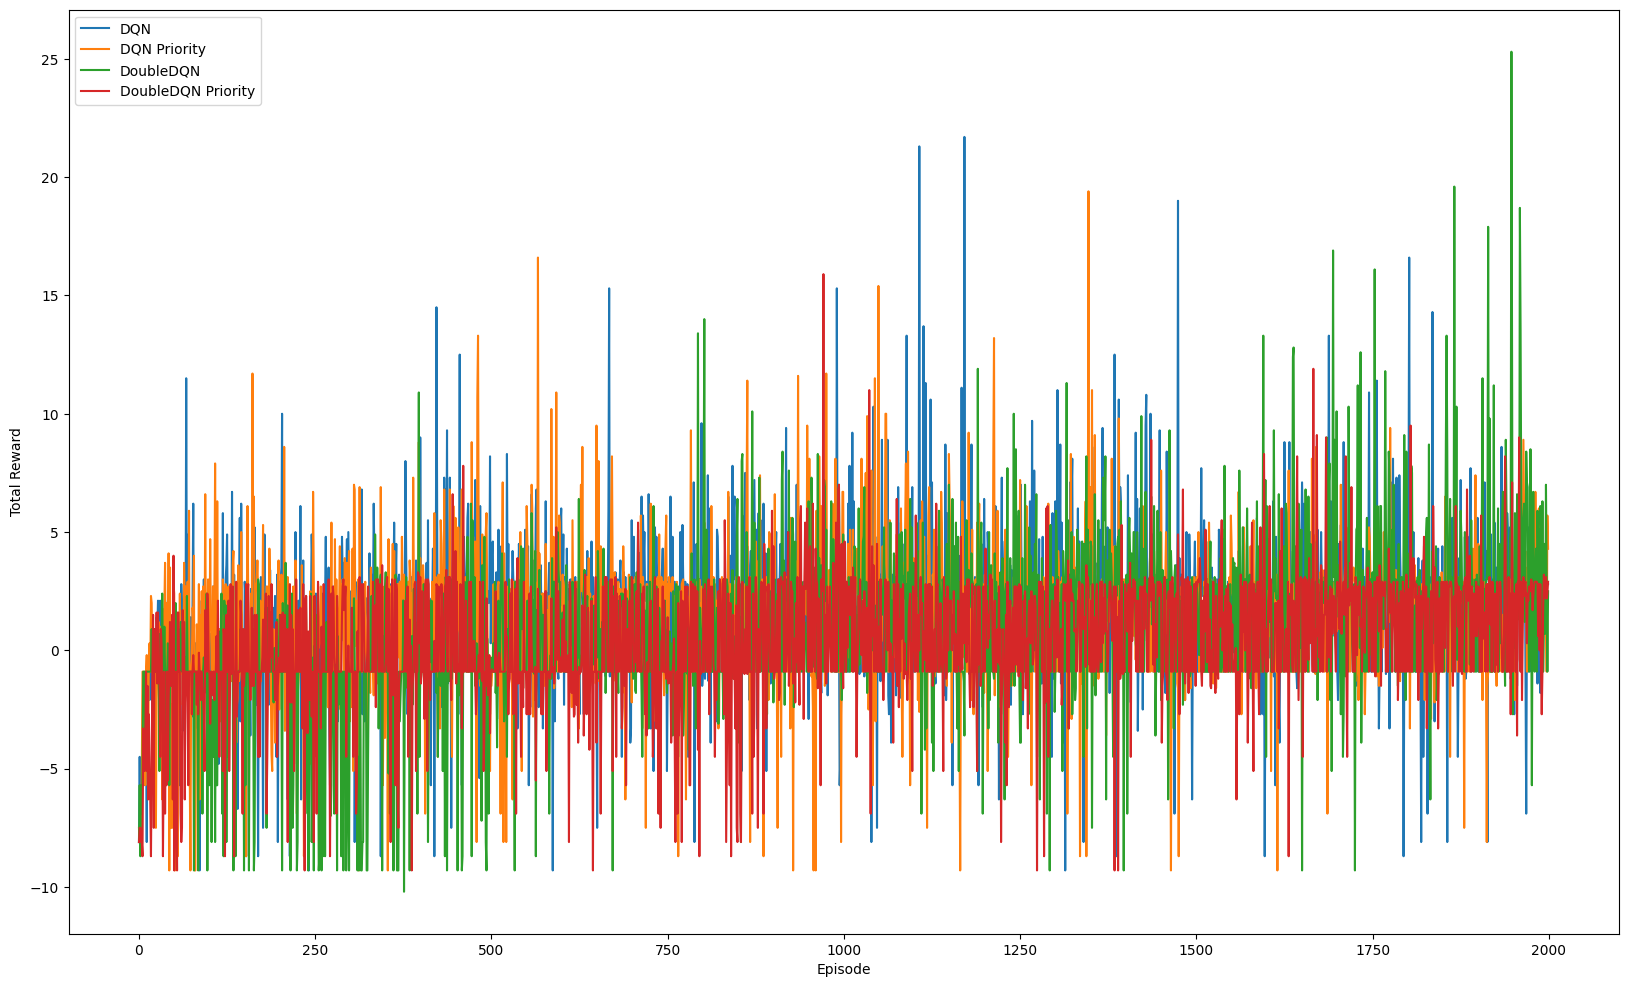

In [19]:
_, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.plot(dqn_rewards, label='DQN')
ax.plot(dqn_priority_rewards, label='DQN Priority')
ax.plot(ddqn_rewards, label='DoubleDQN')
ax.plot(ddqn_priority_rewards, label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

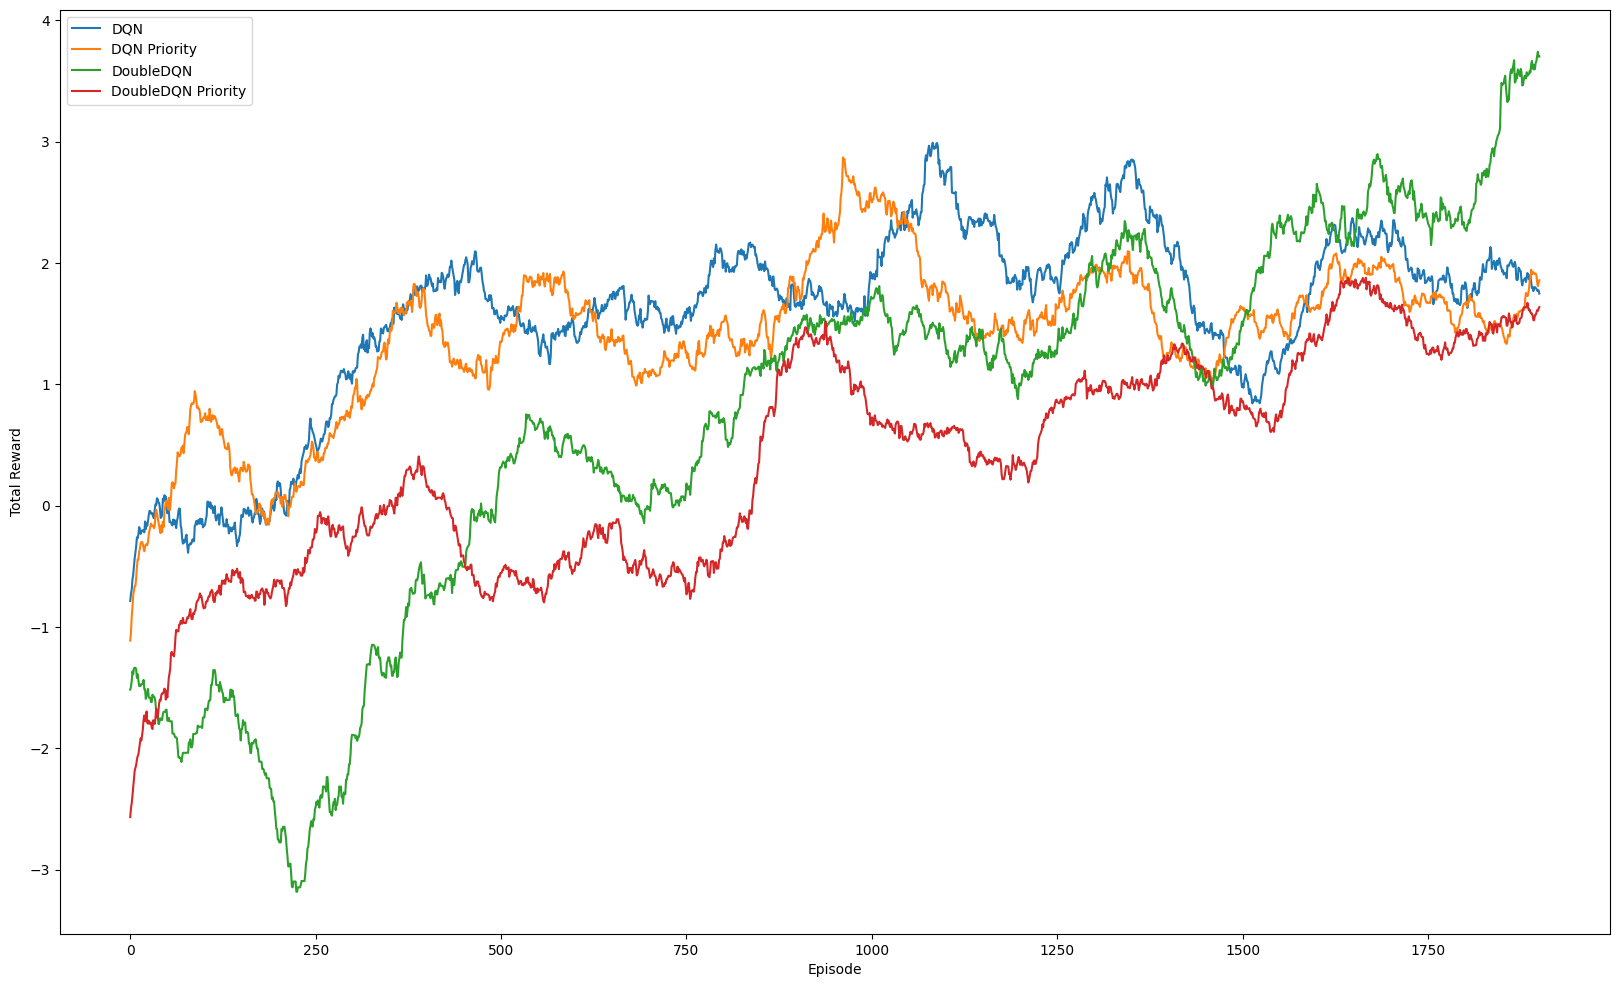

In [22]:
_, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.plot(moving_average(dqn_rewards), label='DQN')
ax.plot(moving_average(dqn_priority_rewards), label='DQN Priority')
ax.plot(moving_average(ddqn_rewards), label='DoubleDQN')
ax.plot(moving_average(ddqn_priority_rewards), label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

Total reward: 2.799999999999999	Steps: 51


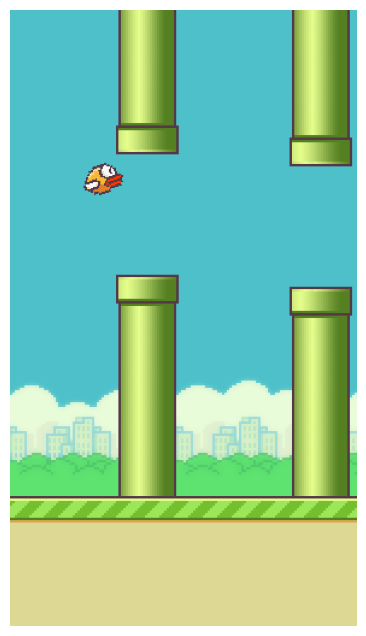

In [15]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(dqn_agent, env, ax)

Total reward: 0.6000000000000019	Steps: 53


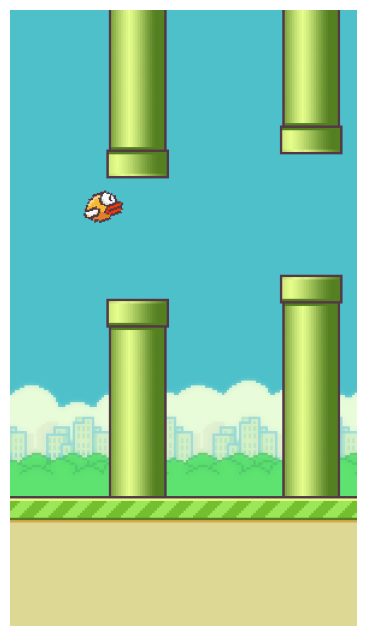

In [16]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(ddqn_agent, env, ax)